# **Bank Notes - Original or not**
Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features.

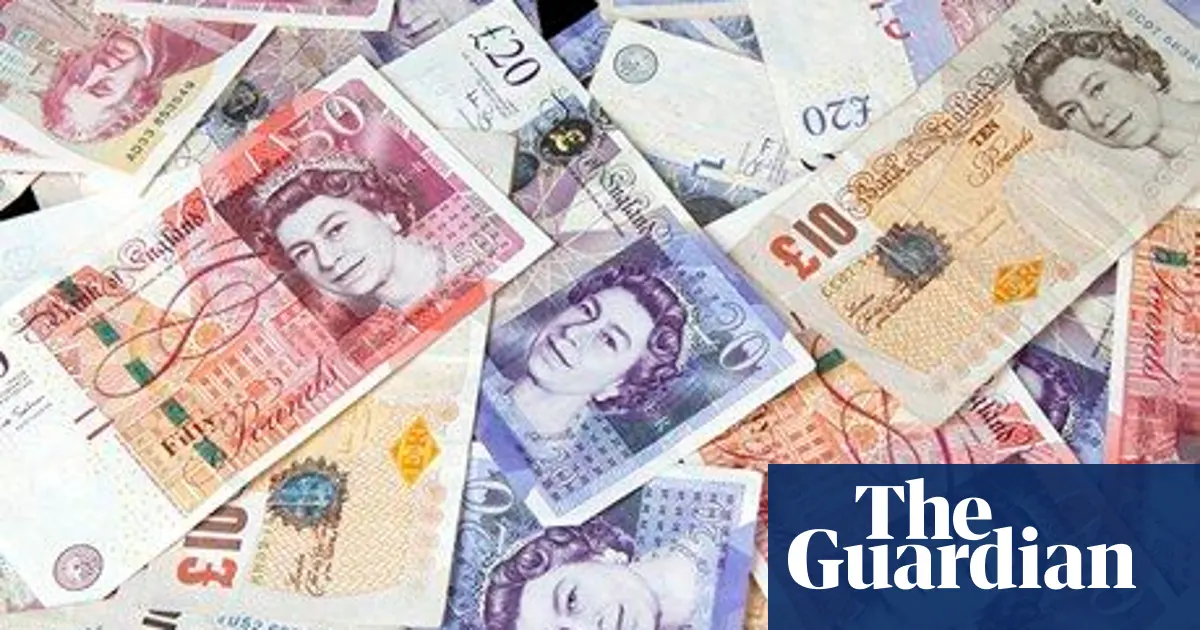


For solving this problem, we will use deep learning approach to tell if a note is original or not. This would come under **Binary classification process** as 0 and 1 would be produced.

**Evaluation criteria = Accuracy**
Calculated as Accuracy = (TP+TN)/(TP+TN+FP+FN) 

where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative 

      


**Stride:**




*   Loading Libraries
*   About the data


*   Dataset Description
*   Data Information


*   Data - Preprocessing
*   Exploratory Data Analysis

*   Deep Learning Model Buidling

 1. Simple Model with no hidden layers
 2. DL Model with hidden layer


*   Evalution and Prediction













**1. Loading Libraries**

In [ ]:
import pandas as pd              # for dataframes
import numpy as np               # for matrix operations
import matplotlib.pyplot as plt  # for visualization
import seaborn as sea            # for visualization of data
%matplotlib inline               # for using notebooks background

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading Dataset from github - link.

In [ ]:
 data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" ) #reading data of .csv format

**2. About the data**

Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes and were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object grey-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool was used to extract features from images.

**Dataset Collection**

The dataset is downloaded from the UCI Machine Learning Repository.

**3. Data Description**

VWTI: Variance of Wavelet Transformed Image

SWTI: Skewness of Wavelet Transformed Image

CWTI: Curtosis of Wavelet Transformed Image

EI: Entropy of Image

Class: Class (1: original, 0: forged)





Using df.head() and df.tail() functions we can review the top and bottom samples.

In [ ]:
data.head() #TOP 5 SAMPLES

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [ ]:
data.tail() #BOTTOM 5 SAMPLES

,VWTI,SWTI,CWTI,EI,Class
1091,1.640600,3.5488,1.39640,-0.36424,0
1092,-0.048008,-1.6037,8.47560,0.75558,0
1093,2.942100,7.4101,-0.97709,-0.88406,0
1094,1.964700,6.9383,0.57722,0.66377,0
1095,-0.126240,10.3216,-3.71210,-6.11850,0


**4. Data Infromation**

#### Information about the dataframe - count of non-null values, data types of columns, memory usage and range indexes.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


As we can see that our dataframe have 1096 rows and 5 columns, out of which 'Class' column is our target column.

In [ ]:
data.shape

(1096, 5)

**5. Data Pre-processing**

Let's see the number of null values in our dataset.

In [ ]:
data.isna().sum()

VWTI     0
SWTI     0
CWTI     0
EI       0
Class    0
dtype: int64

We can clearly see that our dataset do not have any null values. Hence we can proceed further

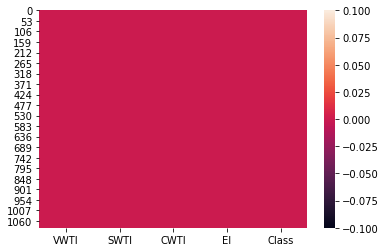

In [33]:
sea.heatmap(data.isna())

It can noted that our data may have redundancy and with duplicated function, we can review them.

In [65]:
data[data.duplicated()]

,VWTI,SWTI,CWTI,EI,Class
209,0.5195,-3.2633,3.0895,-0.9849,0
239,-1.3000,10.2678,-2.9530,-5.8638,0
289,-2.6479,10.1374,-1.3310,-5.4707,0
572,0.3292,-4.4552,4.5718,-0.9888,0
604,-1.8584,7.8860,-1.6643,-1.8384,0
644,-0.2780,8.1881,-3.1338,-2.5276,0
658,-1.3000,10.2678,-2.9530,-5.8638,0
661,-2.6479,10.1374,-1.3310,-5.4707,0
665,0.3292,-4.4552,4.5718,-0.9888,0
747,0.5195,-3.2633,3.0895,-0.9849,0


As we can see there are several duplicated values in our dataset. But we can clearly observe that only '0' class have duplicacy, so before jumping into conclusion of dropping those rows. We can check the balancing of data because duplicacy could be because of imbalanced class.

In [70]:
data['Class'].value_counts()

0    608
1    488
Name: Class, dtype: int64

Now, after checking the count of both classes, we can clearly see that it is quite balanced. Hence we can drop those duplicated data records.

In [72]:
print('Dimensions before dropping duplicated rows: ' + str(data.shape))
data = data.drop(data[data.duplicated()].index)
print('Dimensions after dropping duplicated rows: ' + str(data.shape))

Dimensions before dropping duplicated rows: (1096, 5)
Dimensions after dropping duplicated rows: (1079, 5)


**Now using box-plot we are going to see the outliers and distribution of data**

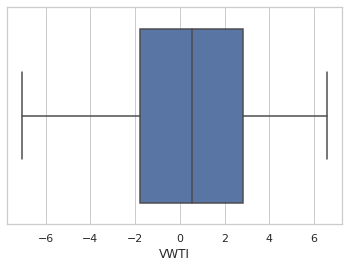

In [60]:
sea.set(style="whitegrid")
ax = sea.boxplot(x=data["VWTI"])

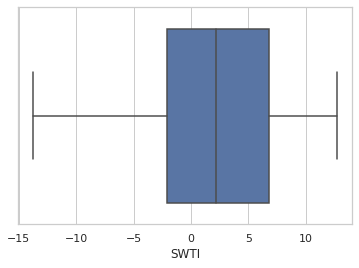

In [61]:
sea.set(style="whitegrid")
ax = sea.boxplot(x=data["SWTI"])

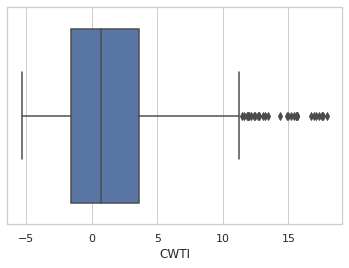

In [62]:
sea.set(style="whitegrid")
ax = sea.boxplot(x=data["CWTI"])

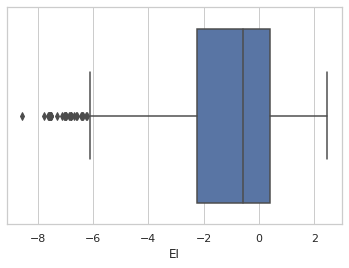

In [63]:
sea.set(style="whitegrid")
ax = sea.boxplot(x=data["EI"])

**6. Exploratory Data Analysis**

For having insights of data and 5 point summary review i.e min, 25%, 50%, 75%, max.

In [ ]:
data.describe()

,VWTI,SWTI,CWTI,EI,Class
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454,0.445255
std,2.852623,5.922621,4.375655,2.084983,0.497221
min,-7.036400,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.790850,-2.125200,-1.574975,-2.246975,0.000000
50%,0.540430,2.205850,0.671900,-0.569190,0.000000
75%,2.835350,6.793925,3.574450,0.399980,1.000000
max,6.563300,12.730200,17.927400,2.449500,1.000000


Bivariate relation of data and behaviour

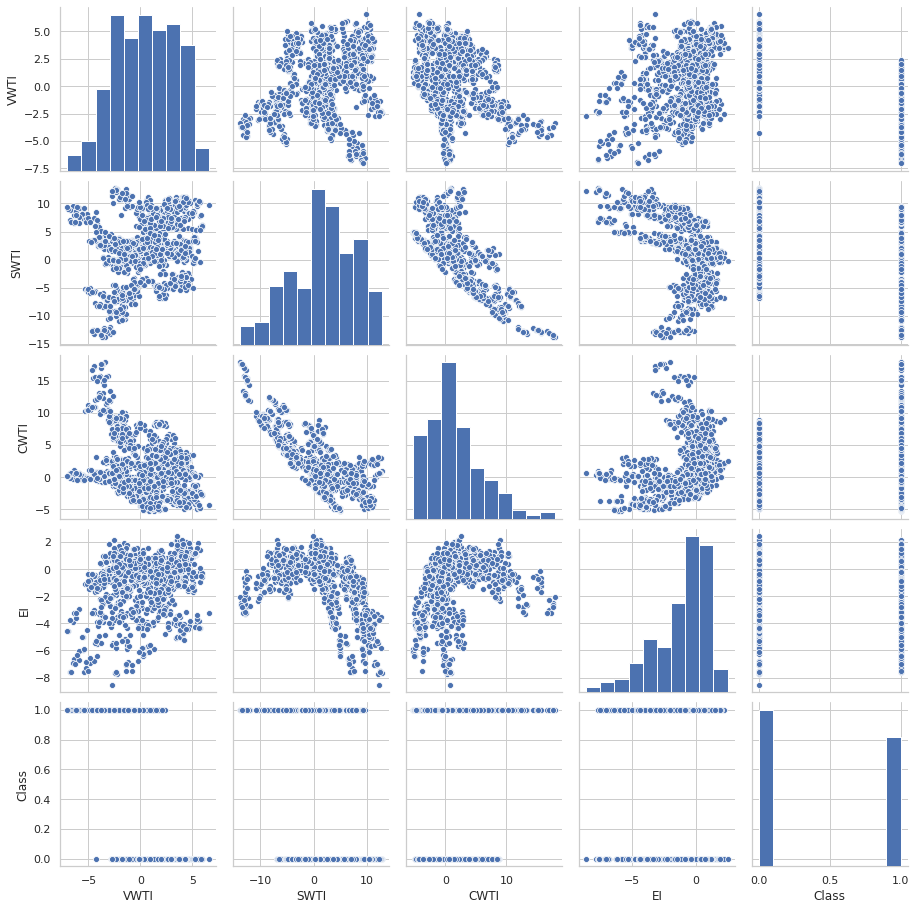

In [73]:
sea.pairplot(data)

In [64]:
data['Class'].unique()

array([0, 1])

Using heatmap function of seaborn library we are going to see the correlation between the columns. The ligher ones are more related than the darker ones.

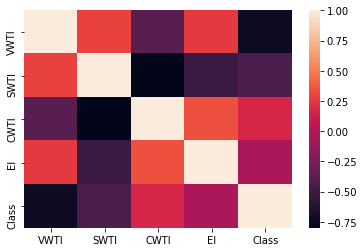

In [32]:
sea.heatmap(data.corr())

Loading the test data with github link.

In [16]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [17]:
test_data

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.542140,-0.52725,0.658600
1,-3.71810,-8.508900,12.36300,-0.955180
2,5.50400,10.367100,-4.41300,-4.021100
3,1.68490,8.748900,-1.26410,-1.385800
4,4.74320,2.108600,0.13680,1.654300
...,...,...,...,...
270,-1.00500,0.084831,-0.24620,0.456880
271,2.21230,-5.839500,7.76870,-0.853020
272,4.38460,-4.879400,3.36620,-0.029324
273,3.88400,10.027700,-3.92980,-4.081900


Null values in test data

In [18]:
test_data.isna().sum()

VWTI    0
SWTI    0
CWTI    0
EI      0
dtype: int64

After exploring our data, we are going to divide our dataset in two form i.e x be the features and y be the targeted value 

In [21]:
x=data.drop('Class', axis = 1)
y=data.Class

Spliting data in train and test i.e train for training the model and test for testing the model.

In [22]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.3, random_state = 42)

In [24]:
n_features = x.shape[1]
print(n_features)

4


Importing Libraries for Deep Learning Model Building

In [48]:
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
import tensorflow

**7.Deep Learning Models - 1) Simple Model without hidden layers**

Steps for Deep Learning Model
1. Define the model
2. Compile the model
3. Fit the model


In [40]:
# Defining the Model
simple_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='sigmoid')     # The input shape is 4. 
])

In [41]:
simple_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [44]:
simple_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
simple_model.fit(x_tr, y_tr, epochs=5)

Epoch 1/5
24/24 [==============================] - 0s 1ms/step - loss: 2.8957 - accuracy: 0.0456
Epoch 2/5
24/24 [==============================] - 0s 992us/step - loss: 2.7336 - accuracy: 0.0678
Epoch 3/5
24/24 [==============================] - 0s 999us/step - loss: 2.5839 - accuracy: 0.0874
Epoch 4/5
24/24 [==============================] - 0s 972us/step - loss: 2.4480 - accuracy: 0.1082
Epoch 5/5
24/24 [==============================] - 0s 1ms/step - loss: 2.3219 - accuracy: 0.1434


In [47]:
simple_model.evaluate(x_ts, y_ts)

11/11 [==============================] - 0s 1ms/step - loss: 2.3470 - accuracy: 0.1246


[2.3470001220703125, 0.12462005764245987]

As we can see that our model is not performing well and showing very low accuracy hence we are moving to model with hidden layers.

**7. Deep Learning Models - 2) Model with hidden layers**

We'll be using relu for first layer and sigmoid function for the second layer.

In [49]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1))

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


Hyper-parameter tuning of model can be done by changing the no. of epochs, batch size and learning rate.
following model is a tuned model.

In [51]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)    # 0.01 is the learning rate

In [52]:
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])

In [54]:
seed_value = 42
seed(seed_value) 

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

# Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)


# Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value) 
model.fit(x_tr, y_tr, epochs=10, batch_size=30, verbose = 1)    # fit the model

Epoch 1/10
26/26 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2/10
26/26 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 3/10
26/26 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4/10
26/26 [==============================] - 0s 959us/step - loss: 0.0022 - accuracy: 0.9987
Epoch 5/10
26/26 [==============================] - 0s 998us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 6/10
26/26 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 0s 942us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
26/26 [==============================] - 0s 944us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/10
26/26 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/10
26/26 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000


**8. Evaluation and Prediction**

Evaluation of model on test data set and it is giving 100% accuracy on it.

In [55]:
model.evaluate(x_ts, y_ts)

11/11 [==============================] - 0s 1ms/step - loss: 7.1197e-04 - accuracy: 1.0000


[0.0007119665970094502, 1.0]

Producing prediction for the test data set.
We are converting the values in 0 and 1 with the threshold value as 0.5

In [31]:
target=model.predict(test_data)
for i in target:
  if i[0]>0.5:
    print(1,end=",")
  else:  
    print(0,end=",")

1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,

After submitting our predictions, we can see that our model has given 100% accuracy on the test dataset. 

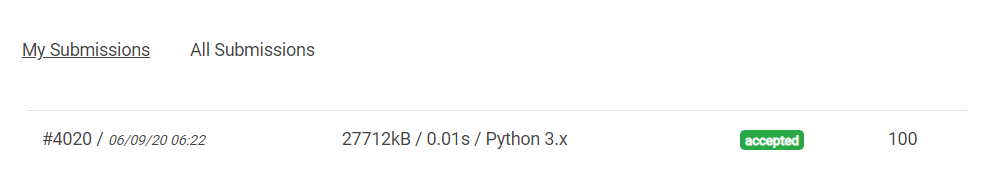